plant_village
Description:
The PlantVillage dataset consists of 54303 healthy and unhealthy leaf images divided into 38 categories by species and disease.

Note: The original dataset is not available from the original source (plantvillage.org), therefore we get the unaugmented dataset from a paper that used that dataset and republished it. Moreover, we dropped images with Background_without_leaves label, because these were not present in the original dataset.
Original paper URL: https://arxiv.org/abs/1511.08060 Dataset URL: https://data.mendeley.com/datasets/tywbtsjrjv/1

Homepage: https://arxiv.org/abs/1511.08060

Source code: tfds.image_classification.PlantVillage

Versions:

1.0.2 (default): No release notes.
Download size: 827.82 MiB

Dataset size: 815.37 MiB

Auto-cached (documentation): No


@article{DBLP:journals/corr/HughesS15,
  author    = {David P. Hughes and
               Marcel Salath{'{e} } },
  title     = {An open access repository of images on plant health to enable the
               development of mobile disease diagnostics through machine
               learning and crowdsourcing},
  journal   = {CoRR},
  volume    = {abs/1511.08060},
  year      = {2015},
  url       = {http://arxiv.org/abs/1511.08060},
  archivePrefix = {arXiv},
  eprint    = {1511.08060},
  timestamp = {Mon, 13 Aug 2018 16:48:21 +0200},
  biburl    = {https://dblp.org/rec/bib/journals/corr/HughesS15},
  bibsource = {dblp computer science bibliography, https://dblp.org}
}

In [7]:
import os
import pathlib
from PIL import Image

import IPython.display as display
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (
    Conv2D, Dense, Dropout, Flatten, MaxPooling2D, Softmax)
import tensorflow_hub as hub
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [2]:
#@title Default title text
#data_dir = tf.keras.utils.get_file(
##    'plants',
#    'https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/tywbtsjrjv-1.zip',
#    untar=True)

#Print data path
#print("cd", dir(data_dir))




!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/tywbtsjrjv-1.zip

--2020-11-15 18:37:56--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/tywbtsjrjv-1.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.104.147
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.104.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1791013744 (1.7G) [application/octet-stream]
Saving to: ‘tywbtsjrjv-1.zip.1’

tywbtsjrjv-1.zip.1  100%[===================>]   1.67G  31.1MB/s    in 56s     

2020-11-15 18:38:53 (30.4 MB/s) - ‘tywbtsjrjv-1.zip.1’ saved [1791013744/1791013744]



In [3]:
!unzip /content/tywbtsjrjv-1.zip -d plants

Archive:  /content/tywbtsjrjv-1.zip
  inflating: plants/Plant_leaf_diseases_dataset_with_augmentation.zip  
  inflating: plants/Plant_leaf_diseases_dataset_without_augmentation.zip  


In [ ]:
#!unzip plants/Plant_leaf_diseases_dataset_with_augmentation.zip
!unzip plants/Plant_leaf_diseases_dataset_without_augmentation.zip

In [8]:
data_dir = '/content/plants_dataset/'
data_dir = pathlib.Path(data_dir)

image_count = len(list(data_dir.glob('*/*.JPG')))
print("There are", image_count, "images.")


CLASS_NAMES = np.array(
    [item.name for item in data_dir.glob('*') ])
print("These are the available classes:", CLASS_NAMES)
print(data_dir)
classes = list(CLASS_NAMES)
print(classes)

There are 52803 images.
These are the available classes: ['Strawberry___Leaf_scorch' 'Squash___Powdery_mildew' 'Corn___Common_rust'
 'Grape___Esca_(Black_Measles)' 'Tomato___Tomato_mosaic_virus'
 'Apple___Cedar_apple_rust' 'Apple___healthy' 'Potato___Early_blight'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Apple___Black_rot'
 'Pepper,_bell___healthy' 'Tomato___Leaf_Mold' 'Grape___healthy'
 'Corn___Cercospora_leaf_spot Gray_leaf_spot' 'Strawberry___healthy'
 'Apple___Apple_scab' 'Tomato___Early_blight' 'Grape___Black_rot'
 'Blueberry___healthy' 'Tomato___Late_blight' 'Raspberry___healthy'
 'Peach___Bacterial_spot' 'Peach___healthy' 'Tomato___healthy'
 'Soybean___healthy' 'Potato___Late_blight'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' 'Corn___healthy'
 'Potato___healthy' 'Cherry___Powdery_mildew'
 'Tomato___Septoria_leaf_spot' 'Orange___Haunglongbing_(Citrus_greening)'
 'Corn___Northern_Leaf_Blight' 'Tomato___Bacterial_spot'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Tomato__

In [9]:

dic ={}
for name in classes:
  roses = list(data_dir.glob(name + "/*"))
  print(name, len(roses))
  dic[name] = len(roses)


Strawberry___Leaf_scorch 1109
Squash___Powdery_mildew 1835
Corn___Common_rust 1192
Grape___Esca_(Black_Measles) 1383
Tomato___Tomato_mosaic_virus 373
Apple___Cedar_apple_rust 275
Apple___healthy 1645
Potato___Early_blight 1000
Tomato___Spider_mites Two-spotted_spider_mite 1676
Apple___Black_rot 621
Pepper,_bell___healthy 1478
Tomato___Leaf_Mold 952
Grape___healthy 423
Corn___Cercospora_leaf_spot Gray_leaf_spot 513
Strawberry___healthy 456
Apple___Apple_scab 630
Tomato___Early_blight 1000
Grape___Black_rot 1180
Blueberry___healthy 1502
Tomato___Late_blight 1909
Raspberry___healthy 371
Peach___Bacterial_spot 2297
Peach___healthy 360
Tomato___healthy 1591
Soybean___healthy 5090
Potato___Late_blight 1000
Tomato___Tomato_Yellow_Leaf_Curl_Virus 5357
Corn___healthy 1162
Potato___healthy 152
Cherry___Powdery_mildew 1052
Tomato___Septoria_leaf_spot 1771
Orange___Haunglongbing_(Citrus_greening) 5507
Corn___Northern_Leaf_Blight 985
Tomato___Bacterial_spot 2127
Grape___Leaf_blight_(Isariopsis_Leaf

{'Strawberry___Leaf_scorch': 1109, 'Squash___Powdery_mildew': 1835, 'Corn___Common_rust': 1192, 'Grape___Esca_(Black_Measles)': 1383, 'Tomato___Tomato_mosaic_virus': 373, 'Apple___Cedar_apple_rust': 275, 'Apple___healthy': 1645, 'Potato___Early_blight': 1000, 'Tomato___Spider_mites Two-spotted_spider_mite': 1676, 'Apple___Black_rot': 621, 'Pepper,_bell___healthy': 1478, 'Tomato___Leaf_Mold': 952, 'Grape___healthy': 423, 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 513, 'Strawberry___healthy': 456, 'Apple___Apple_scab': 630, 'Tomato___Early_blight': 1000, 'Grape___Black_rot': 1180, 'Blueberry___healthy': 1502, 'Tomato___Late_blight': 1909, 'Raspberry___healthy': 371, 'Peach___Bacterial_spot': 2297, 'Peach___healthy': 360, 'Tomato___healthy': 1591, 'Soybean___healthy': 5090, 'Potato___Late_blight': 1000, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 5357, 'Corn___healthy': 1162, 'Potato___healthy': 152, 'Cherry___Powdery_mildew': 1052, 'Tomato___Septoria_leaf_spot': 1771, 'Orange___Haunglon

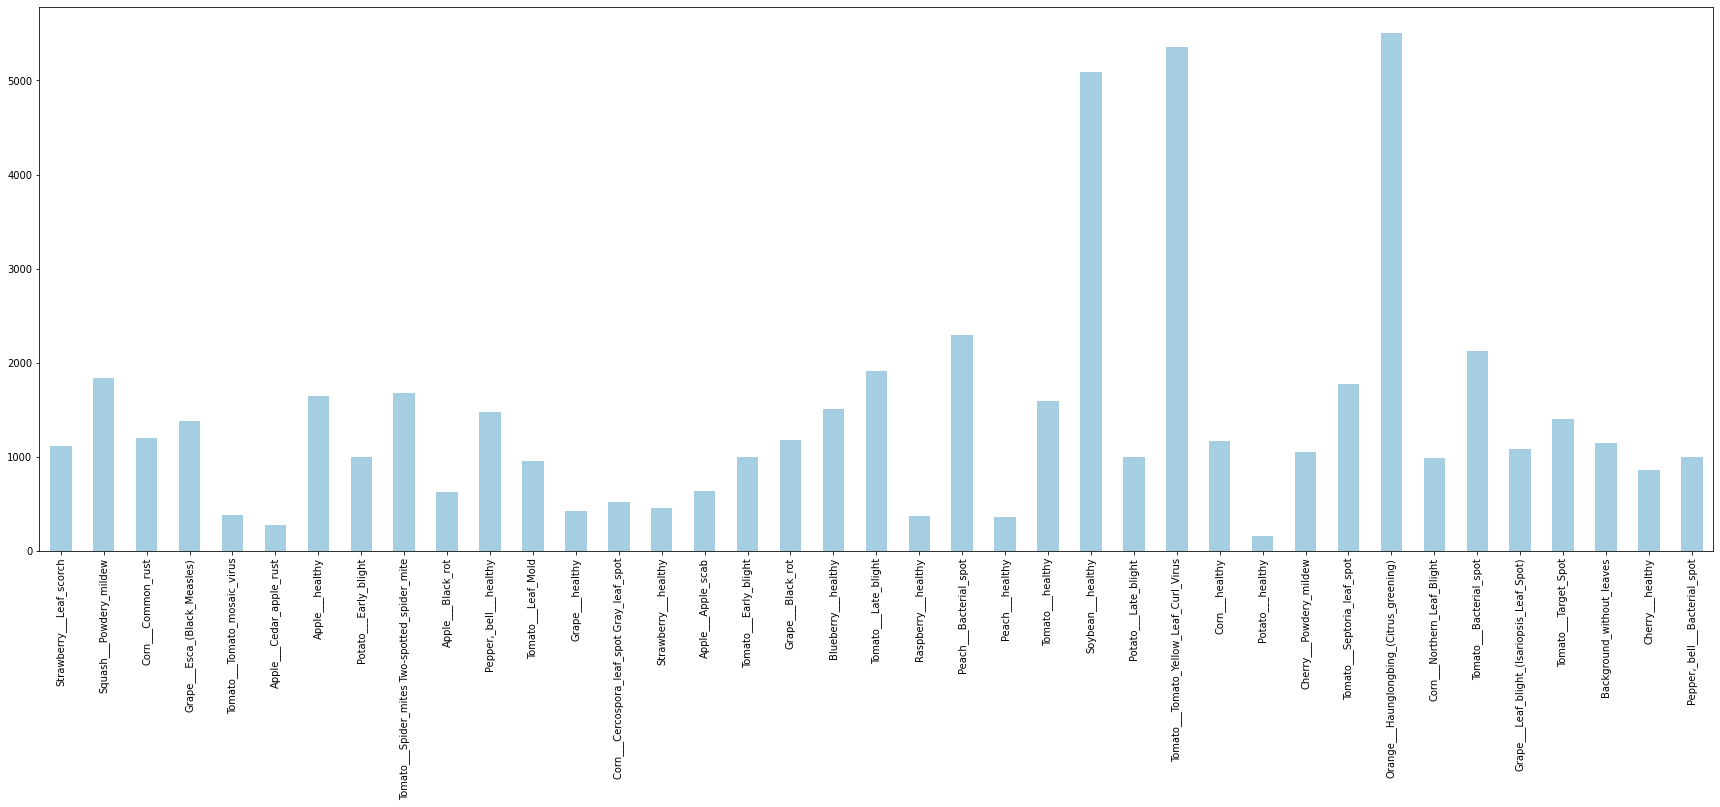

In [10]:
import pandas  as pd
print(dic)
df = pd.DataFrame.from_dict(dic , orient='index')
df = df
df.plot.bar(figsize = (30,10) , legend =False, colormap='Paired' )


In [11]:
batch_size = 6
img_height = 224
img_width = 224



train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.5,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)




Found 55448 files belonging to 39 classes.
Using 27724 files for training.


In [12]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.5,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 55448 files belonging to 39 classes.
Using 27724 files for validation.


In [13]:
df_train_ds ={}
for i in range(0,39):
  #print(train_ds.class_names[i]  ," : ",  len(train_ds.class_names[i])*6, "|" ,len(val_ds.class_names[i])*6 )
  df_train_ds[train_ds.class_names[i]] = [len(train_ds.class_names[i])*6 ,len(val_ds.class_names[i])*6 ]

df_train_ds= pd.DataFrame.from_dict(df_train_ds ,orient='index', columns=[ "train " , "valid"])
df_train_ds


,train,valid
Apple___Apple_scab,108,108
Apple___Black_rot,102,102
Apple___Cedar_apple_rust,144,144
Apple___healthy,90,90
Background_without_leaves,150,150
Blueberry___healthy,114,114
Cherry___Powdery_mildew,138,138
Cherry___healthy,96,96
Corn___Cercospora_leaf_spot Gray_leaf_spot,252,252
Corn___Common_rust,108,108


Text(0.5, 1.0, 'Train and Test Sets')

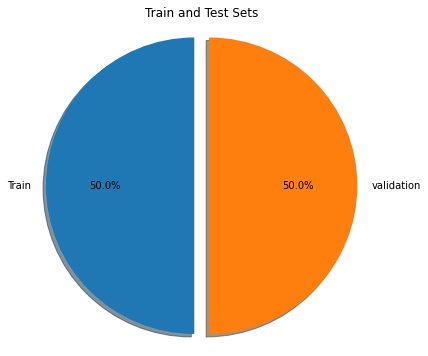

In [14]:
labels = ['Train', 'validation']
sizes = [len(train_ds), len(val_ds)]
explode = (0, 0.1)

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Train and Test Sets')


In [52]:
class_names = train_ds.class_names
print(class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Background_without_leaves', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


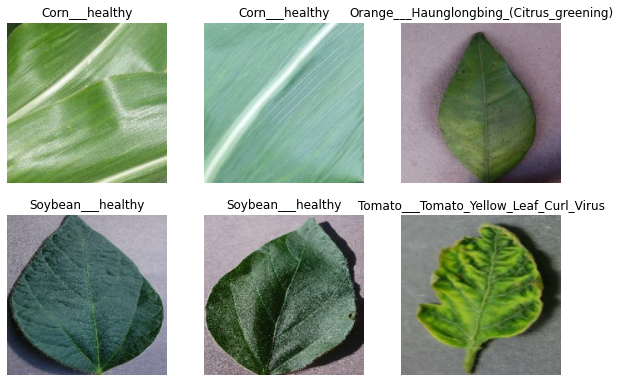

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(2):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

#train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
#val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

train_ds = train_ds.shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [16]:
from tensorflow.keras import layers
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3))


# MOBILE-NET V2 100_224
- The source paper for Mobilenet is located here: https://arxiv.org/pdf/1704.04861.pdf
-MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications, Howard et al, 2017.
-This feature extractor converts each 224x224x3 image into a 5x5x1280 block of features.

In [20]:

nclasses  = 39

module_selection = "mobilenet_v2_100_224"
module_handle = "https://tfhub.dev/google/imagenet/{}/feature_vector/4" \
    .format(module_selection)

transfer_model = tf.keras.Sequential([
    normalization_layer,
    hub.KerasLayer(module_handle, trainable=False),
    tf.keras.layers.Dense(nclasses, activation='softmax')
])
transfer_model.build((None,)+(224, 224, 3))
transfer_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
keras_layer_2 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_2 (Dense)              (None, 39)                49959     
Total params: 2,307,943
Trainable params: 49,959
Non-trainable params: 2,257,984
_________________________________________________________________


In [25]:
transfer_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [26]:
History = transfer_model.fit(train_ds,
  validation_data=val_ds,
  steps_per_epoch = 30,
  validation_steps = 30,
  epochs=50)

Epoch 1/50
30/30 [==============================] - 13s 433ms/step - loss: 3.6142 - accuracy: 0.1556 - val_loss: 2.8413 - val_accuracy: 0.3389
Epoch 2/50
30/30 [==============================] - 13s 417ms/step - loss: 2.4311 - accuracy: 0.4222 - val_loss: 1.9394 - val_accuracy: 0.4944
Epoch 3/50
30/30 [==============================] - 13s 419ms/step - loss: 1.6220 - accuracy: 0.5778 - val_loss: 1.6360 - val_accuracy: 0.5333
Epoch 4/50
30/30 [==============================] - 13s 417ms/step - loss: 1.4649 - accuracy: 0.6278 - val_loss: 1.2496 - val_accuracy: 0.6333
Epoch 5/50
30/30 [==============================] - 13s 418ms/step - loss: 1.1599 - accuracy: 0.6889 - val_loss: 1.0985 - val_accuracy: 0.7000
Epoch 6/50
30/30 [==============================] - 13s 418ms/step - loss: 1.0451 - accuracy: 0.7611 - val_loss: 0.9747 - val_accuracy: 0.7500
Epoch 7/50
30/30 [==============================] - 13s 420ms/step - loss: 0.8960 - accuracy: 0.7444 - val_loss: 0.9170 - val_accuracy: 0.7333

In [28]:
transfer_model.save("model.h5")

In [67]:
labels = list(History.history.keys())
print(labels)

['loss', 'accuracy', 'val_loss', 'val_accuracy']


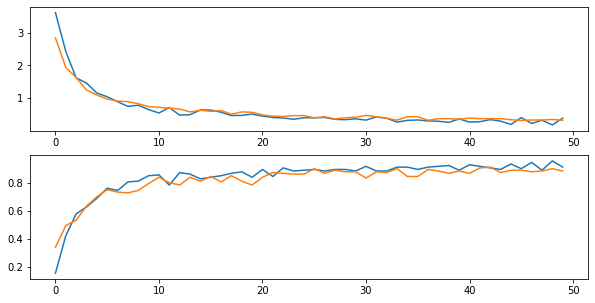

In [29]:
from matplotlib import pyplot as plt




fig, axs = plt.subplots(2, 1 , figsize=(10,5))
#axs[0, 0].plot(x, y)
##axs[0, 0].set_title('Axis [0, 0]')
#axs[0, 1].plot(x, y, 'tab:orange')
#axs[0, 1].set_title('Axis [0, 1]')
#axs[1, 0].plot(x, -y, 'tab:green')
#axs[1, 0].set_title('Axis [1, 0]')
#axs[1, 1].plot(x, -y, 'tab:red')
#axs[1, 1].set_title('Axis [1, 1]')



#plt.yscale('log')
axs[0].plot(History.history['loss'])
axs[0].plot(History.history['val_loss'])
axs[1].plot(History.history['accuracy'])
axs[1].plot(History.history['val_accuracy'])


In [41]:
reconstructed_model = tf.keras.models.load_model("model.h5",custom_objects={'KerasLayer':hub.KerasLayer})

#reconstructed_model.build((None,)+(224, 224, 3))
reconstructed_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
keras_layer_2 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_2 (Dense)              (None, 39)                49959     
Total params: 2,307,943
Trainable params: 49,959
Non-trainable params: 2,257,984
_________________________________________________________________


In [55]:
#for image_batch , labels_batch in val_ds:
#  break
#predictions = transfer_model.predict(image_batch)
transfer_model.evaluate(val_ds.take(100))

100/100 [==============================] - 21s 211ms/step - loss: 0.3442 - accuracy: 0.8817


[0.3442056179046631, 0.8816666603088379]

In [56]:
batch_size = 300
img_height = 224
img_width = 224



test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.5,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)






Found 55448 files belonging to 39 classes.
Using 27724 files for validation.


In [64]:
predictions = []
real_label  = []
for image_batch , labels_batch in test_ds.take(50):
  
  predictions.extend(np.argmax(transfer_model.predict(image_batch), axis =-1))
  real_label.extend(labels_batch.numpy())

In [67]:
print(len(real_label))

15000


In [60]:
#predictions_pred =np.argmax(predictions, axis=-1)

In [70]:
 from sklearn.metrics import classification_report
cl_report = classification_report(predictions,real_label , target_names=list(test_ds.class_names))
print("the classification report : \n" , cl_report)

the classification report : 
                                                precision    recall  f1-score   support

                           Apple___Apple_scab       0.89      0.87      0.88       187
                            Apple___Black_rot       0.92      0.97      0.95       174
                     Apple___Cedar_apple_rust       0.67      0.98      0.80        58
                              Apple___healthy       0.95      0.97      0.96       432
                    Background_without_leaves       0.92      1.00      0.96       283
                          Blueberry___healthy       0.98      0.96      0.97       403
                      Cherry___Powdery_mildew       0.99      0.79      0.88       383
                             Cherry___healthy       0.95      0.99      0.97       236
   Corn___Cercospora_leaf_spot Gray_leaf_spot       0.85      0.60      0.70       204
                           Corn___Common_rust       0.99      0.98      0.98       338
            

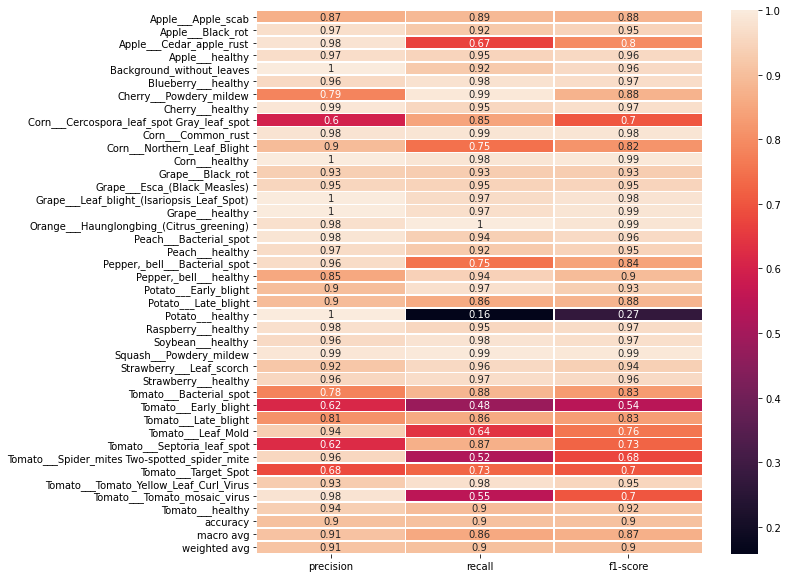

In [74]:
import seaborn as sns
import pandas as pd
plt.figure(figsize = (10,10))
#print("the classification report : \n" , cl_report)
cl_report = classification_report(real_label,predictions, target_names = list(test_ds.class_names), output_dict=True)
sns.heatmap(pd.DataFrame(cl_report).iloc[:-1, :].T, annot= True, linewidths=.5)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')